In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
measles_raw_data = pd.read_csv("measles - measles.csv")
measles_raw_data.head()
measles_raw_data.groupby("year").count()

C:\Users\trvaughn\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,state,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
year,,,,,,,,,,,,,,,
2017,1939,1939,1939,0,1939,0,0,1939,1939,1939,0,0,0,1939,1939
2017-18,10418,10418,10418,7183,6060,10390,0,4970,10418,10418,9,1829,2698,10410,10410
2018-19,48075,48075,48075,22308,34573,43788,0,40900,48075,48075,84,17723,4483,46539,46539


In [3]:
measles_clean = measles_raw_data.drop(columns=["xper", "xmed", "xrel", "district", "year", "county", "enroll"])
# measles_clean = measles_clean.dropna()

measles_clean.dtypes

index        int64
state       object
name        object
type        object
city        object
mmr        float64
overall    float64
lat        float64
lng        float64
dtype: object

In [4]:
# neg_count = measles_clean.loc[["mmr" == "-1"]]
# len(neg_count)

measles_clean['mmr'].value_counts()
measles_clean['overall'].value_counts()

-1.000000      27224
 98.000000      5191
 100.000000     3619
 95.000000      3051
 99.000000      1764
               ...  
 90.140845         1
 96.020000         1
 43.640000         1
 98.098859         1
 90.052356         1
Name: overall, Length: 2691, dtype: int64

In [5]:
measles_clean = measles_clean.loc[measles_clean["mmr"] >= 0]
measles_clean = measles_clean.loc[measles_clean["overall"] >= 0]
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,NaN,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,NaN,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,NaN,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,NaN,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [6]:
measles_clean["type"].fillna("Other", inplace = True)
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,Other,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,Other,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,Other,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,Other,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [7]:
# Terra's Code starts here

In [8]:
school_type = measles_clean.groupby('type')

count_school_type = school_type['type'].count()
count_school_type

type
Kindergarten     1484
Other            3122
Private          2258
Public          14904
Name: type, dtype: int64

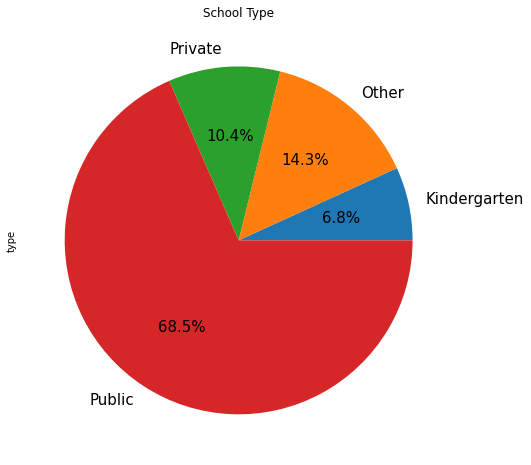

<Figure size 432x288 with 0 Axes>

In [9]:
school_type_pie = count_school_type.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=15, autopct='%0.1f%%', \
                                         labels=['Kindergarten', 'Other', 'Private', 'Public'], title=['School Type']) 
# school_type_pie.set_ylabel("Types of Schools")
# plt.axis('equal') 
# plt.title('Type of School')

plt.show()                           
plt.tight_layout()
# type_vals = type_count['type']
# type_labels = type_count['index']

In [10]:
state_percents = measles_clean.groupby('state')

count_state_percents = state_percents['type'].count()
count_state_percents

state
California    14224
Colorado       1505
Ohio           2917
Oregon          806
Vermont         338
Washington     1978
Name: type, dtype: int64

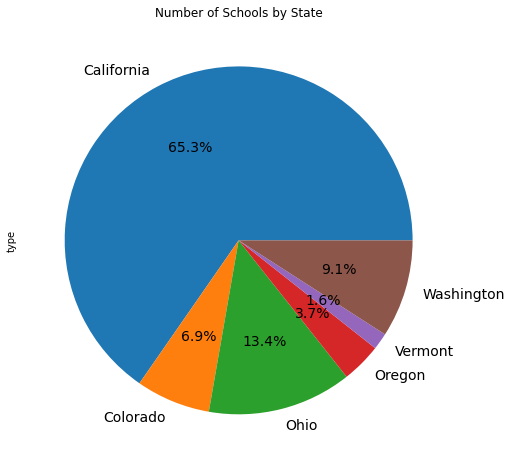

<Figure size 432x288 with 0 Axes>

In [11]:
school_type_pie = count_state_percents.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=14, autopct='%0.1f%%', \
                                         labels=['California', 'Colorado', 'Ohio', 'Oregon', 'Vermont', 'Washington'], \
                                         title=['Number of Schools by State']) 

# texts[0].set_fonsize(4)
plt.show()                           
plt.tight_layout()

In [12]:
# Terra's code ends here